# Sprint5: Train-Test con ScikitLearn 

## Tarea M5 T02

### Ejercicio 1:Parte el conjunto de datos adjunto en train y test. Estudia ambos conjuntos por separado, a nivel descriptivo.

Iformación sobre el Dataset:

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

1.1 Carga del conjunto de datos


In [77]:
import pandas as pd


ruta = "C:/Users/acbon/Desktop/Data Science/housing data.csv"

df = pd.read_csv(ruta, encoding='ISO-8859-1')

df.to_csv(ruta, index=False) # Guarda el DataFrame en un archivo CSV

df.head(10)

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
6,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
7,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
8,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
9,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0


In [78]:

data = [[0.00632, 18.00, 2.310, 0, 0.5380, 6.5750, 65.20, 4.0900, 1, 296.0, 15.30, 396.90, 4.98, 24.00]]
df = pd.DataFrame(data, columns=['0.00632', '18.00', '2.310', '0', '0.5380', '6.5750', '65.20', '4.0900', '1', '296.0', '15.30', '396.90', '4.98', '24.00'])

nuevos_nombres = {'0.00632': 'CRIM', '18.00': 'ZN', '2.310': 'INDUS', '0': 'CHAS', '0.5380': 'NOX', '6.5750': 'RM', '65.20': 'AGE', '4.0900': 'DIS', '1': 'RAD', '296.0': 'TAX', '15.30': 'PTRATIO', '396.90': 'B', '4.98': 'LSTAT', '24.00': 'MEDV'}
df = df.rename(columns=nuevos_nombres)

print(df)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.09    1  296.0     15.3   

       B  LSTAT  MEDV  
0  396.9   4.98  24.0  


1.2 Análisis básico de los datos 

In [79]:
num_atributos = len(df.columns)
nombres_atributos = df.columns

print(f'Número de atributos: {num_atributos}')
print('Nombres de atributos:')
for nombre in nombres_atributos:
    print(nombre)

Número de atributos: 14
Nombres de atributos:
CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT
MEDV


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     1 non-null      float64
 1   ZN       1 non-null      float64
 2   INDUS    1 non-null      float64
 3   CHAS     1 non-null      int64  
 4   NOX      1 non-null      float64
 5   RM       1 non-null      float64
 6   AGE      1 non-null      float64
 7   DIS      1 non-null      float64
 8   RAD      1 non-null      int64  
 9   TAX      1 non-null      float64
 10  PTRATIO  1 non-null      float64
 11  B        1 non-null      float64
 12  LSTAT    1 non-null      float64
 13  MEDV     1 non-null      float64
dtypes: float64(12), int64(2)
memory usage: 240.0 bytes


In [81]:
print("Descripción de los datos")
df.describe()


Descripción de los datos


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,1.00000,1.0,1.00,1.0,1.000,1.000,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0
mean,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
25%,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
50%,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
75%,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
max,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [82]:
print("El número de líneas es: " + str(df.shape[0]) + " y el número de columnas: "+ str(df.shape[1]))

El número de líneas es: 1 y el número de columnas: 14


In [83]:
print("No existe ningún null")

df.isnull().sum()

No existe ningún null


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [84]:
print("Los valores únicos son los siguentes:")
df.nunique()

Los valores únicos son los siguentes:


CRIM       1
ZN         1
INDUS      1
CHAS       1
NOX        1
RM         1
AGE        1
DIS        1
RAD        1
TAX        1
PTRATIO    1
B          1
LSTAT      1
MEDV       1
dtype: int64

1.3 Train y Test del conjunto de datos.


En el conjunto de datos de Boston Housing, el objetivo típico es predecir el valor mediano de las viviendas ocupadas por el propietario (columna "MEDV"). Esto se considera una tarea de regresión, ya que se está tratando de predecir un valor numérico continuo, que representa el precio mediano de las viviendas en miles de dólares.

Por lo tanto, la columna objetivo más apropiada para hacer un conjunto de entrenamiento y prueba en este conjunto de datos sería "MEDV". También es necesario  utilizar las características (atributos) como "CRIM," "ZN," "INDUS," "CHAS," y otros para predecir el precio de las viviendas en función de esas características. Esta es una tarea común en la predicción de precios de bienes raíces o en problemas relacionados con la valoración de propiedades.

En definitiva, en el conjunto de datos de Boston Housing, "MEDV" es la columna objetivo más relevante para predecir el precio mediano de las viviendas, por lo que sería la elección adecuada para crear un conjunto de entrenamiento y prueba en un problema de regresión. En esta división, el 30% de los datos se reservará para el conjunto de prueba, y se establece una semilla aleatoria (random_state=42) para garantizar la reproducibilidad de la división.

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split


ruta_del_archivo = 'C:/Users/acbon/Desktop/Data Science/housing data.csv'

nombres_columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(ruta_del_archivo, encoding='ISO-8859-1', names=nombres_columnas, header=None)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X = df.drop('MEDV', axis=1)  # Características
y = df['MEDV']  # Columna objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensiones del conjunto de entrenamiento:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

print("\nDimensiones del conjunto de prueba:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Dimensiones del conjunto de entrenamiento:
X_train: (354, 13), y_train: (354,)

Dimensiones del conjunto de prueba:
X_test: (152, 13), y_test: (152,)


De acuerdo al resultado obtenido podemos observar que el conjunto de entrenamiento contiene 354 muestras, cada una con 13 características.
El conjunto de prueba contiene 152 muestras, también con 13 características. Tanto el conjunto de entrenamiento como el de prueba tienen una sola columna para la variable objetivo, pero esto se representa como una dimensión unidimensional.

1.4 Ánalisis descriptivo del conjunto de datos de entrenamiento y prueba

1.4.1: Conjunto de Entrenamiento.

In [86]:
print("Información del conjunto de entrenamiento:")
print(X_train.info())

Información del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 5 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    int64  
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    int64  
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 38.7 KB
None


In [87]:
print("Estadisticas descriptivas del conjunto de entrenamiento:")
print(X_train.describe())


Estadisticas descriptivas del conjunto de entrenamiento:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  354.000000  354.000000  354.000000  354.000000  354.000000  354.000000   
mean     3.469887   11.403955   11.133051    0.073446    0.557259    6.325672   
std      8.315831   22.608457    6.938651    0.261237    0.116792    0.719211   
min      0.009060    0.000000    1.210000    0.000000    0.385000    3.863000   
25%      0.082320    0.000000    5.130000    0.000000    0.450000    5.889500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.227500   
75%      3.281688   20.000000   18.100000    0.000000    0.631000    6.681750   
max     88.976200   95.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  354.000000  354.000000  354.000000  354.000000  354.000000  354.000000   
mean    68.799718    3.765874    9.437853  407.0423

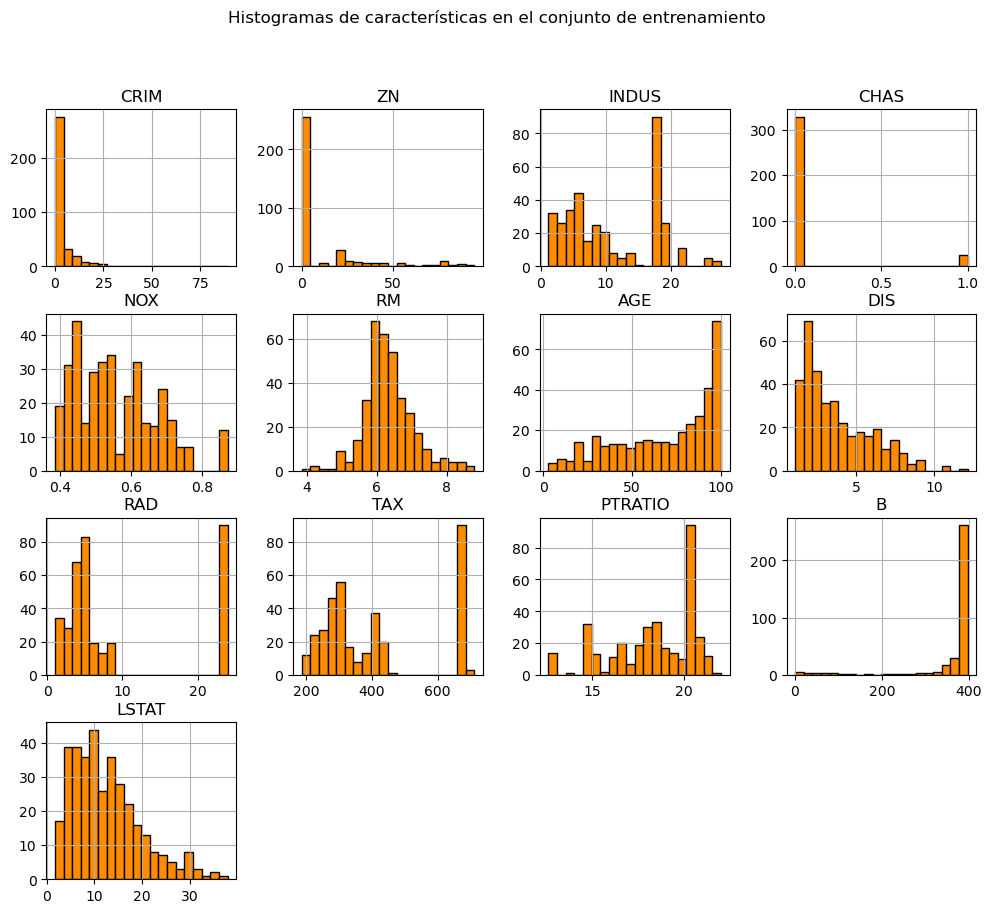

In [88]:
# Histogramas de las características en el conjunto de entrenamiento
import matplotlib.pyplot as plt

X_train.hist(bins=20, figsize=(12, 10), color='darkorange', edgecolor='black')
plt.suptitle("Histogramas de características en el conjunto de entrenamiento")
plt.show()



Analizando los histogramas, se identifican varios patrones, posibles anomalías y tendencias:

Patrones:

- Bimodalidad: En las características INDUS y RAD, se observan distribuciones bimodales, lo cual puede indicar la presencia de dos grupos distintos dentro de la muestra en relación con zonas industriales y accesibilidad a autopistas.
- Distribución Normal Aproximada: La característica RM parece seguir una distribución normal, sugiriendo que el número medio de habitaciones por vivienda es relativamente homogéneo y se centra en torno a una media.
- Sesgo: Muchas características como CRIM, ZN, NOX, AGE, DIS, y LSTAT presentan sesgo, ya sea hacia la derecha o la izquierda, lo que indica que los valores extremos son menos comunes.

Anomalías:

- Valores Extremos: En características como CRIM y ZN, se notan barras altas cerca del origen, seguidas de un largo tramo sin barras y luego algunas barras individuales altas lejos del origen. Esto puede sugerir la presencia de valores atípicos.
- Variables Binarias/Categóricas: CHAS parece ser una variable binaria/categórica con una gran mayoría de observaciones en una sola categoría, lo que puede ser atípico en comparación con las otras variables continuas.

Tendencias:

- Zonas Residenciales y Comerciales: La distribución de ZN indica que es más común no tener zonas para lotes grandes, mientras que la bimodalidad de INDUS podría reflejar una tendencia hacia ciertos tipos de zonificación industrial.
- Edad de la Vivienda: La característica AGE muestra que hay una cantidad considerable de viviendas que son bastante antiguas, lo que podría influir en políticas de renovación o en la planificación urbana.
- Ratios Sociales y Económicas: El alto número de observaciones con valores altos en B sugiere una tendencia de ciudades con una alta proporción de residentes de ascendencia afroamericana, mientras que LSTAT muestra una tendencia general hacia un bajo estatus socioeconómico en la población.
Aqui es importante señalar que, a pesar de que la fórmula que abarca los datos de la columna "B" parece ser una referencia al Índice de Disimilaridad, una medida demográfica utilizada para evaluar la segregación. El uso de datos demográficos como la raza en modelos predictivos de precios de vivienda puede ser considerada discriminatoria y racista, ya que perpetúa las disparidades sistémicas y puede violar principios de igualdad y no discriminación. Es crucial asegurarse de que cualquier modelo utilizado para analizar los valores de la vivienda no perpetúe la discriminación ni refuerce las desigualdades existentes.

Estas observaciones pueden ser cruciales para la toma de decisiones en áreas como la planificación urbana, la política social y la inversión en bienes raíces, y pueden requerir un análisis más profundo para comprender las causas subyacentes y las implicaciones de estos patrones, anomalías y tendencias.









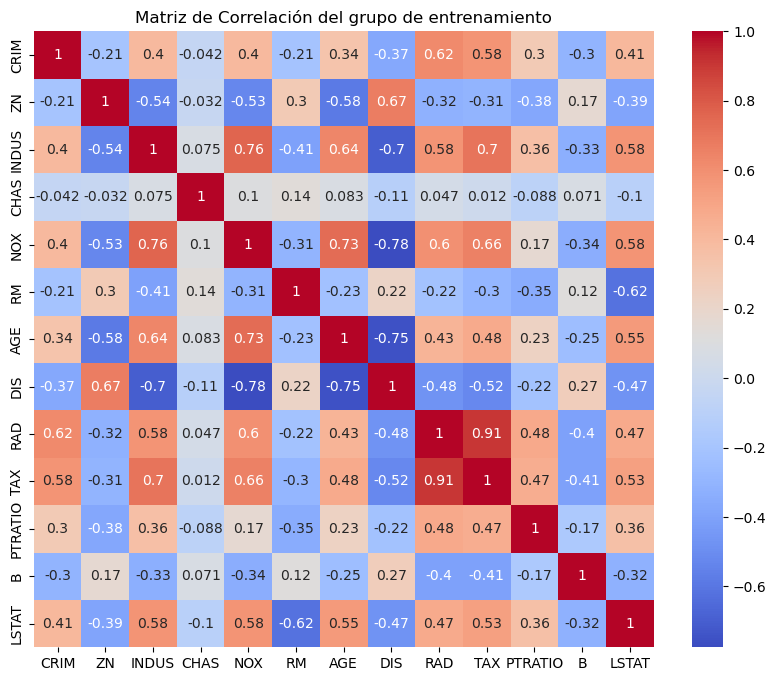

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = X_train.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación del grupo de entrenamiento")
plt.show()

La matriz de correlación muestra el grado de linealidad entre los pares de variables en los datos. En términos de linealidad, aquí hay algunas conclusiones que se pueden extraer de la matriz:

- Alta Linealidad: pares con alta correlación positiva como RAD y TAX muestran una relación lineal muy fuerte, lo que implica que cuando una variable aumenta, la otra tiende a aumentar en una manera casi proporcional.
Igualmente, una alta correlación negativa como la de DIS y NOX indica una fuerte relación lineal inversa, donde un aumento en una variable está asociado con una disminución correspondiente en la otra.

- Moderada Linealidad: Pares con correlaciones moderadas, como CRIM y RAD o CRIM y TAX, sugieren una relación lineal menos pronunciada, pero aún significativa.

- Baja o Nula Linealidad: Variables como CHAS con otras características muestran correlaciones cercanas a cero, lo que indica que no hay una relación lineal clara entre ellas. Esto significa que no se puede predecir el comportamiento de una variable basándose en la otra mediante un modelo lineal.

- Potencial Multicolinealidad: Correlaciones muy altas entre algunas variables (como RAD y TAX) sugieren multicolinealidad, lo cual es importante en la modelización estadística, ya que la presencia de variables altamente correlacionadas puede distorsionar la importancia de las variables independientes en un modelo lineal.

- Distribución de Correlaciones: La matriz de correlación también sugiere que no todas las variables están relacionadas linealmente entre sí de la misma manera. Algunas variables tienen múltiples relaciones lineales fuertes con otras variables, mientras que otras tienen muy pocas o ninguna.

En conclusión, la linealidad en los datos es variable y depende de qué pares de características estemos considerando. Para la modelización predictiva o la inferencia causal, es esencial tener en cuenta estas relaciones para evitar interpretaciones erróneas de los efectos de las variables y para construir modelos robustos.

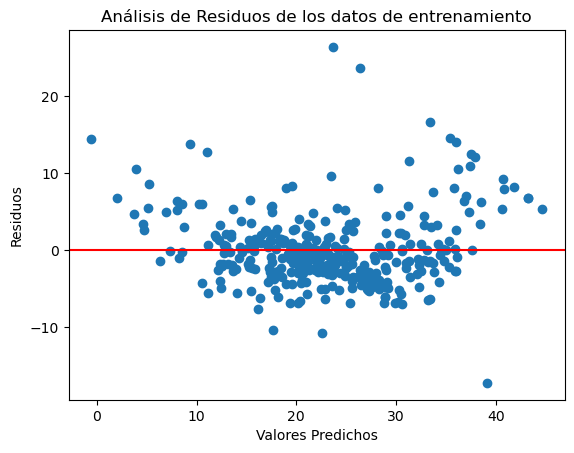

MSE de los residuos: 22.55


In [131]:
# Ánalisis de residuos del grupo de Entrenamiento
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supongamos que tienes tus datos de entrenamiento X_train y y_train

# Inicializa y ajusta un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones en los datos de entrenamiento
y_pred = model.predict(X_train)

# Calcula los residuos
residuos = y_train - y_pred

# Grafica los residuos
plt.scatter(y_pred, residuos)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Análisis de Residuos de los datos de entrenamiento")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Calcula la media del error cuadrado (MSE) de los residuos
mse = mean_squared_error(y_train, y_pred)
print(f"MSE de los residuos: {mse:.2f}")





Segun el ánalisis de residuos, podemos observar lo siguiente:

- Patrones no Aleatorios: Si los residuos mostraran algún patrón claro, como una forma curva o en forma de embudo, esto indicaría no linealidades no capturadas por el modelo o heteroscedasticidad. En este gráfico, aunque no hay un patrón curvilíneo claro, la dispersión de los residuos parece aumentar a medida que aumentan los valores predichos, lo que podría sugerir heteroscedasticidad.

- Estructuras no Lineales: La falta de un patrón sistemático en la dispersión de los residuos a lo largo del rango de valores predichos podría indicar que el modelo ha capturado la relación lineal entre las variables. Sin embargo, la presencia de residuos que parecen alejarse más de la línea de cero residuos a medida que aumentan los valores predichos podría ser una señal de que una relación no lineal no ha sido completamente modelada.

- Distribución de Residuos: Los residuos deberían distribuirse aleatoriamente alrededor de la línea roja horizontal que representa el residuo cero, con aproximadamente la misma cantidad de residuos por encima y por debajo de esta línea a lo largo de todo el rango de valores predichos. En este gráfico, parece haber una concentración de residuos alrededor de la línea de cero, pero con algunos residuos dispersos que sugieren posibles valores atípicos o una varianza de error que aumenta con los valores predichos.

- Varianza Constante (Homoscedasticidad): Para un buen ajuste de modelo, los residuos deberían mostrar homoscedasticidad, lo que significa que la varianza de los residuos es constante a lo largo de los valores predichos. En este gráfico, la aparente expansión de la dispersión a medida que aumentan los valores predichos sugiere que el modelo podría beneficiarse de una revisión para considerar la heteroscedasticidad.

En pocas palabras, el gráfico sugiere que hay indicios de heteroscedasticidad y potencialmente algunas no linealidades no capturadas por el modelo. 

In [92]:
# Estadísticas descriptivas para la columna objetivo en el conjunto de entrenamiento
target_stats = y_train.describe()
print(target_stats.describe())


count      8.000000
mean      63.394301
std      118.195696
min        5.000000
25%       15.397146
50%       22.382910
75%       32.450000
max      354.000000
Name: MEDV, dtype: float64


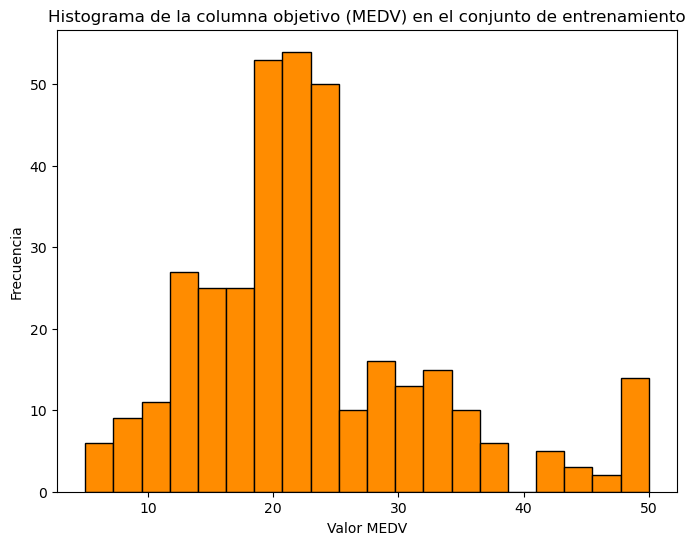

In [132]:
# Histograma de la columna objetivo en el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=20, color='darkorange', edgecolor='black')
plt.title("Histograma de la columna objetivo (MEDV) en el conjunto de entrenamiento")
plt.xlabel("Valor MEDV")
plt.ylabel("Frecuencia")
plt.show()


El histograma de la columna objetivo "MEDV" en el conjunto de entrenamiento parece mostrar la distribución de valores medianos de viviendas en una región o conjunto de datos específico.

Podemos observar que el histograma está sesgado hacia la derecha, lo que significa que hay una mayor frecuencia de valores medianos de vivienda en el extremo inferior del rango de precios y menos en el extremo superior.
La mayoría de los valores de "MEDV" están concentrados entre 10 y 30, lo que sugiere que la mayoría de las viviendas en este conjunto de datos tienen un valor mediano en este rango.
Hay una presencia notable de valores más altos, pero con una frecuencia mucho menor. Esto puede indicar la existencia de algunas viviendas que son significativamente más caras que la mayoría de las otras en el conjunto de datos.
El rango de valores alrededor de 20 a 25 parece ser el más común, lo que se podría considerar como la moda de esta distribución.
Existe una caída notable en la frecuencia después del valor 50, lo que podría sugerir un punto de corte o un valor máximo en los datos, donde los valores que exceden este punto podrían haber sido truncados o limitados.

En el contexto de un modelo predictivo, esta distribución podría implicar que un modelo puede tener un rendimiento relativamente bueno al predecir valores de viviendas en el rango medio, pero puede enfrentar desafíos con valores más extremos debido a su menor frecuencia. Además, la presencia de sesgo y valores atípicos podría afectar la precisión de un modelo de regresión lineal, por lo que se podrían considerar transformaciones de los datos o modelos robustos a los valores atípicos.


1.4.2 Conjunto de Prueba

In [94]:
print("Información del conjunto de prueba:")
print(X_test.info())

Información del conjunto de prueba:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 173 to 447
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null    float64
 3   CHAS     152 non-null    int64  
 4   NOX      152 non-null    float64
 5   RM       152 non-null    float64
 6   AGE      152 non-null    float64
 7   DIS      152 non-null    float64
 8   RAD      152 non-null    int64  
 9   TAX      152 non-null    float64
 10  PTRATIO  152 non-null    float64
 11  B        152 non-null    float64
 12  LSTAT    152 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 16.6 KB
None


In [95]:
# Estadísticas descriptivas del conjunto de prueba
print("\nEstadísticas descriptivas del conjunto de prueba:")
print(X_test.describe())


Estadísticas descriptivas del conjunto de prueba:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  152.000000  152.000000  152.000000  152.000000  152.000000  152.000000   
mean     3.948046   11.269737   11.145461    0.059211    0.548723    6.189059   
std      9.252844   24.983828    6.697032    0.236799    0.113877    0.654707   
min      0.006320    0.000000    0.460000    0.000000    0.392000    3.561000   
25%      0.079710    0.000000    5.692500    0.000000    0.448750    5.872750   
50%      0.243035    0.000000    9.690000    0.000000    0.532000    6.159500   
75%      4.367163    0.000000   18.100000    0.000000    0.614000    6.463500   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  152.000000  152.000000  152.000000  152.000000  152.000000  152.000000   
mean    68.051316    3.862975    9.809211  411.019737   1

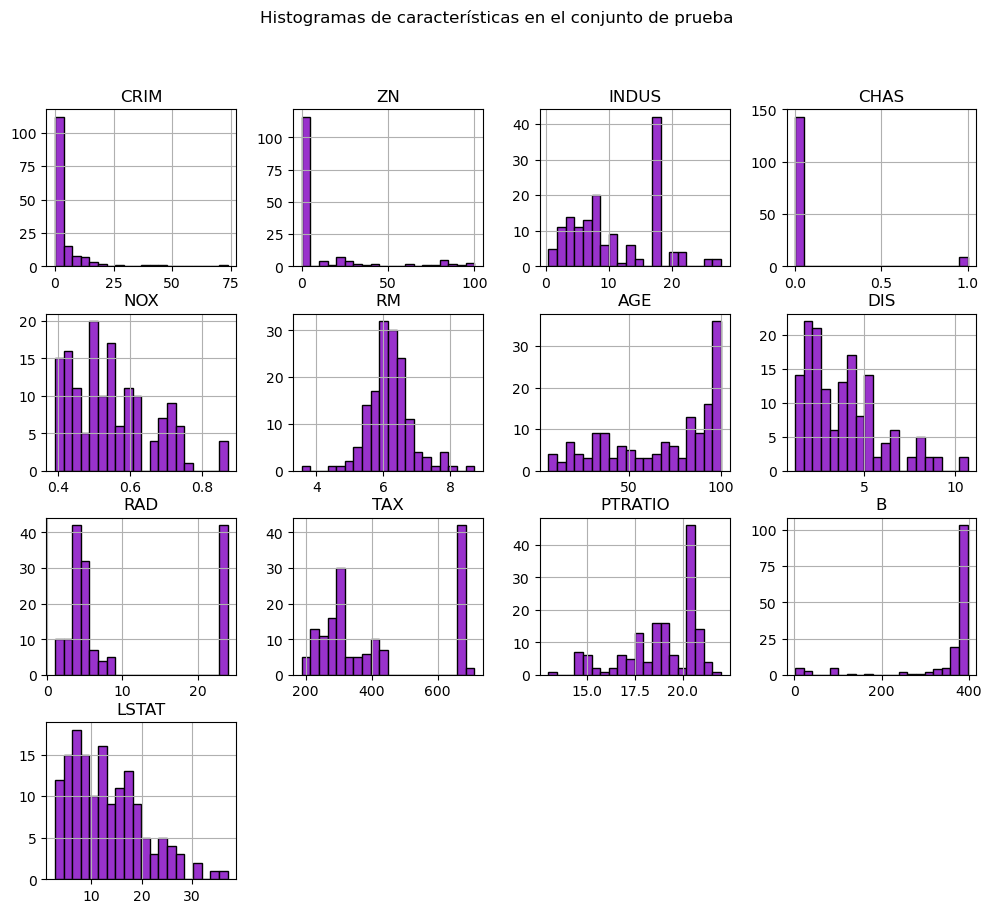

In [96]:
# Histogramas de las características en el conjunto de prueba
X_test.hist(bins=20, figsize=(12, 10),  color='darkorchid', edgecolor='black')
plt.suptitle("Histogramas de características en el conjunto de prueba")
plt.show()


En el gráfico "Histogramas de características en el conjunto de prueba" se pueden observar patrones, anomalías y tendencias similares a las que se encontaron en el conjunto de entrenamiento. 

- Patrones: La mayoría de las características parecen tener distribuciones sesgadas o asimétricas.Algunas características como ZN, CHAS, y RAD muestran un patrón de agrupación en valores bajos con un largo "tail" hacia valores más altos, lo que indica que pocos distritos tienen valores altos para estas variables. RM y LSTAT parecen tener distribuciones más simétricas en comparación con las otras características.

- Anomalías: Algunos histogramas muestran barras individuales separadas del grupo principal de barras (por ejemplo, CHAS), lo cual puede indicar la presencia de valores atípicos o una distribución con múltiples modas. La característica CRIM parece tener una concentración muy alta de valores cerca de cero y luego una dispersión de barras hacia valores más altos, lo que podría sugerir una alta presencia de valores extremadamente bajos de criminalidad y unos pocos valores muy altos.

- Tendencias: INDUS y NOX, que podrían estar relacionadas con zonas industriales y niveles de contaminación, respectivamente, muestran un sesgo hacia valores más bajos. La característica AGE muestra una tendencia hacia valores más altos, lo que podría indicar que hay muchas viviendas antiguas en el conjunto de datos de prueba. La característica TAX muestra una posible bimodalidad, con dos picos en la distribución, lo que podría sugerir dos grupos distintos en términos de tasas de impuestos a la propiedad.

Estas observaciones proporcionan información valiosa para comprender las características del conjunto de datos de prueba y para evaluar si las distribuciones de las características son consistentes con las del conjunto de entrenamiento, lo cual es importante para garantizar que el modelo generalice bien a nuevos datos. Si las distribuciones en el conjunto de prueba difieren significativamente de las del conjunto de entrenamiento, esto podría afectar el rendimiento del modelo y podría requerir un ajuste en el proceso de modelado o en la preparación de los datos.

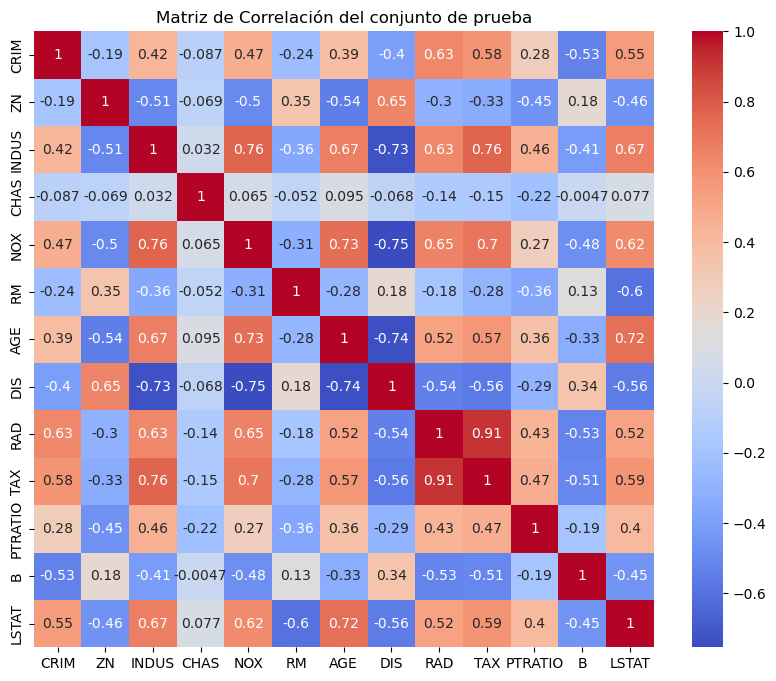

In [134]:
#Matriz de Correlación del conjunto de prueba

# Calcula la matriz de correlación
correlation_matrix = X_test.corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación del conjunto de prueba")
plt.show()

La matriz de correlación del conjunto de prueba muestra las relaciones entre diferentes características, similares a lo que se observan en el conjunto de entrenamiento. Las correlaciones positivas indican una relación directa entre las variables, mientras que las negativas indican una relación inversa. Valores cercanos a 1 o -1 representan una fuerte correlación, y valores cercanos a 0 indican poca o ninguna correlación.

Correlaciones Positivas Fuertes:
- INDUS y NOX: La correlación de 0.76 sugiere una fuerte relación directa; posiblemente, las áreas más industrializadas tienen niveles más altos de contaminación por óxidos de nitrógeno.
- AGE y NOX: Una correlación de 0.73 puede indicar que las viviendas más antiguas se encuentran en áreas con mayor contaminación.
- RAD y TAX: La correlación de 0.91 es muy fuerte, lo que sugiere que hay una relación directa entre la accesibilidad a las carreteras radiales y la tasa de impuestos a la propiedad.

Correlaciones Negativas Fuertes:
- DIS y NOX: Una correlación de -0.75 implica que lugares más distantes de los centros de empleo tienen niveles más bajos de NOX, lo cual es coherente con menos contaminación lejos de zonas industriales o centros urbanos.
- DIS y INDUS: Con una correlación de -0.74, sugiere que las áreas industriales tienden a estar más cerca de los centros de empleo.

Correlaciones Moderadas:
- CRIM y RAD, así como CRIM y TAX, tienen correlaciones moderadas positivas, lo que podría indicar que áreas con mayor criminalidad tienen una mayor accesibilidad a autopistas y posiblemente tasas de impuestos más altas.

Correlaciones Débiles o Inexistentes:
CHAS tiene correlaciones bajas con casi todas las demás variables, lo que sugiere que cualquier característica que represente (como la proximidad a un río) no tiene una relación lineal fuerte con las demás variables del conjunto de datos.


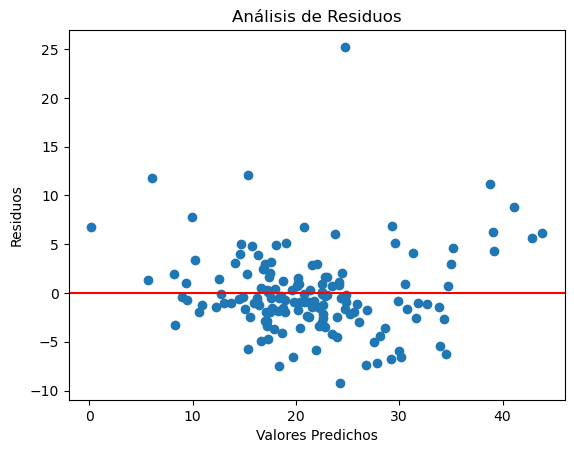

MSE de los residuos: 18.09


In [99]:
# Ánalisis de residuos del grupo de Prueba

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supongamos que tienes tus datos de entrenamiento X_train y y_train

# Inicializa y ajusta un modelo de regresión lineal
model = LinearRegression()
model.fit(X_test, y_test)

# Realiza predicciones en los datos de entrenamiento
y_pred = model.predict(X_test)

# Calcula los residuos
residuos = y_test - y_pred

# Grafica los residuos
plt.scatter(y_pred, residuos)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Análisis de Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Calcula la media del error cuadrado (MSE) de los residuos
mse = mean_squared_error(y_test, y_pred)
print(f"MSE de los residuos: {mse:.2f}")


En este gráfico podemos observar que los residuos se grafican contra los valores predichos. Este tipo de gráfico es utilizado para evaluar la adecuación del modelo utilizado para los datos. 

- Distribución de Residuos: Los residuos parecen estar distribuidos aleatoriamente alrededor de la línea horizontal que representa residuos de cero, lo cual es un buen indicio. No hay patrones claros que sugieran una no linealidad evidente.

- Homoscedasticidad: La varianza de los residuos parece ser constante en relación con los valores predichos, lo que sugiere homoscedasticidad. No hay signos claros de heteroscedasticidad, como un embudo o patrones en forma de abanico que indicarían una varianza de error que cambia con el nivel de la variable predictora.

- Valores Atípicos: Hay algunos puntos residuales que se desvían significativamente de la línea cero, lo cual podría indicar la presencia de valores atípicos en los datos. Estos puntos podrían tener un efecto sustancial en el modelo y podrían merecer una investigación adicional.

- Ausencia de Estructuras Complicadas: No parece haber curvaturas o patrones sistemáticos en la dispersión de los puntos, lo que podría sugerir que el modelo ha capturado adecuadamente la relación entre las variables predictoras y la variable de respuesta.

En general, basándose en este gráfico de residuos, el modelo parece ser adecuado para los datos con la posible excepción de algunos valores atípicos. 

In [100]:
# Estadísticas descriptivas para la columna objetivo en el conjunto de prueba
test_target_stats = y_test.describe()
print(test_target_stats.describe())


count      8.000000
mean      37.189816
std       48.323562
min        5.000000
25%       14.408908
50%       20.703947
75%       30.593750
max      152.000000
Name: MEDV, dtype: float64


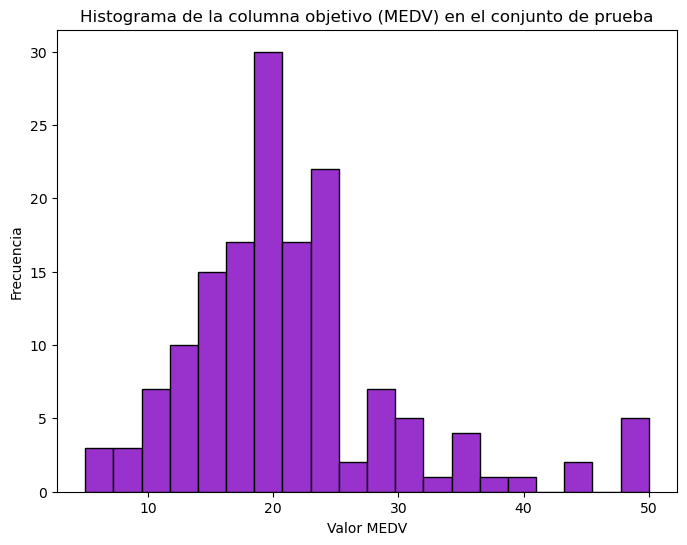

In [101]:
# Histograma de la columna objetivo en el conjunto de prueba
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20, color='darkorchid', edgecolor='black')
plt.title("Histograma de la columna objetivo (MEDV) en el conjunto de prueba")
plt.xlabel("Valor MEDV")
plt.ylabel("Frecuencia")
plt.show()


El histograma de la columna objetivo (MEDV) en el conjunto de prueba muestra la frecuencia de los valores medianos de vivienda (MEDV). En este gráfico podemos observar lo siguiente: 

- Distribución de Precios: La mayoría de los valores de MEDV se concentran en el rango bajo a medio, con un pico particularmente alto alrededor de 20. Esto indica que una gran proporción de las viviendas en el conjunto de prueba tienen un valor mediano cercano a este punto.

- Sesgo a la Derecha: La distribución parece estar sesgada hacia la derecha, lo que significa que hay menos viviendas con valores medianos altos. Esto es típico en los mercados inmobiliarios donde hay muchas más viviendas de precio medio y bajo que de alto precio.

- Valores Atípicos: Aunque hay menos frecuencia en valores altos, todavía hay viviendas que alcanzan valores de 50, lo que puede indicar la presencia de propiedades de lujo o valores atípicos en los datos.

- Comparación con el Conjunto de Entrenamiento: Si comparamos este histograma con el del conjunto de entrenamiento, podríamos evaluar si la distribución de MEDV es consistente entre ambos. Una consistencia en la distribución de la variable objetivo entre el entrenamiento y la prueba es crucial para un modelo predictivo fiable.

La información del histograma es valiosa para entender la distribución de la variable que estamos tratando de predecir y puede ser útil para informar el proceso de modelado, como la selección de un modelo apropiado o la necesidad de transformar los datos para mejorar el ajuste del modelo.

### Ejercicio 2: Aplica algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).



Despues de analizar los conjuntos de datos de entrenamiento y prueba respectivamente, se ha decidido que la combinación de la estandarización de datos numéricos y la creación de características polinómicas es una elección estratégica para mejorar el análisis predictivo por varias razones:

1. Estandarización de Datos Numéricos:

- Comparabilidad: Coloca todas las características en la misma escala, lo que es esencial para modelos que son sensibles a la magnitud de las variables, como aquellos que usan métodos basados en distancia (KNN, SVM) o que aplican penalizaciones de regularización (Lasso, Ridge).
- Mejora del Gradiente: Facilita la convergencia más rápida durante el entrenamiento al proporcionar un gradiente más consistente y estable en todas las dimensiones.
- Regularización: Cuando se utilizan técnicas de regularización, la estandarización asegura que todas las características contribuyan por igual a la penalización, evitando que las características con mayor magnitud dominen el término de penalización.
- Estabilidad Numérica: Reduce la probabilidad de problemas numéricos durante el cálculo, como el desbordamiento o la pérdida de precisión significativa.

2. Creación de Características Polinómicas:

- Captura de Relaciones No Lineales: La realidad es que muchas relaciones entre características y objetivos no son lineales. La expansión polinómica permite que modelos lineales capturen estas relaciones no lineales.
- Interacciones entre Características: Además de los términos polinómicos individuales, también incluye términos de interacción entre las características, lo que puede revelar relaciones entre variables que no son evidentes en el análisis univariado.
- Flexibilidad Modelado: Proporciona un mayor nivel de flexibilidad en el modelado, permitiendo que el modelo se ajuste más estrechamente a la complejidad de los datos, lo que puede ser particularmente útil en conjuntos de datos donde las relaciones entre las variables son complejas.
- Mejora del Rendimiento: Puede llevar a una mejora significativa en el rendimiento del modelo si la relación entre las características y la variable objetivo es intrínsecamente polinómica o interactúa de manera compleja.

Al aplicar ambos procesos de transformación, se mejora potencialmente la capacidad del modelo para comprender y adaptarse a los datos, lo que puede llevar a predicciones más precisas y un análisis predictivo más contundentes. Sin embargo, es importante tener en cuenta el riesgo de sobreajuste, especialmente cuando se introducen muchas características polinómicas en modelos con conjuntos de datos relativamente pequeños. Por lo tanto, la validación cruzada y los métodos de selección de características pueden ser necesarios para garantizar que las mejoras en el rendimiento del modelo sean genuinas y se generalicen bien a los datos no vistos.


In [138]:
from sklearn.preprocessing import StandardScaler

# Estandarización de los datos numéricos
scaler = StandardScaler()

# Aplicamos la estandarización a los conjuntos de entrenamiento y prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación de características polinómicas después de la estandarización
# Inicializamos el generador de características polinómicas
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

# Ajustamos los datos de entrenamiento y transformamos tanto los de entrenamiento como los de prueba
X_train_poly_scaled = polynomial_features.fit_transform(X_train_scaled)
X_test_poly_scaled = polynomial_features.transform(X_test_scaled)

# Mostramos las nuevas formas de los conjuntos transformados con características polinómicas
X_train_poly_scaled.shape, X_test_poly_scaled.shape


((354, 104), (152, 104))

La estandarización de los datos numéricos y la creación de características polinómicas se han aplicado con éxito a los conjuntos de datos de entrenamiento y prueba. Las dimensiones resultantes después de la estandarización y la transformación polinómica son:

- Conjunto de entrenamiento: (354,104) 
- Conjunto de prueba: (152, 104)

Esto significa que ahora cada conjunto tiene 104 características derivadas de la expansión polinómica de segundo grado de las 13 características originales después de la estandarización. La estandarización es un paso importante antes de aplicar la expansión polinómica, ya que coloca todas las características en la misma escala, lo que es particularmente útil cuando se combinan con modelos lineales que utilizan regularización

Por otro lado, he convertido los conjuntos de entrenamiento y prueba estandarizados y con características polinómicas en DataFrames, utilizando los nombres de las características originales para crear las etiquetas de las nuevas características polinómicas. 

In [143]:

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_scaled = polynomial_features.fit_transform(X_train_scaled)

# Generamos los nombres de las nuevas características polinómicas basadas en los nombres originales
poly_feature_names = polynomial_features.get_feature_names_out(feature_names)

# Convertimos los arrays de NumPy a DataFrames de pandas para una mejor visualización con las etiquetas de columnas apropiadas
X_train_poly_scaled_df = pd.DataFrame(X_train_poly_scaled, columns=poly_feature_names)
X_test_poly_scaled_df = pd.DataFrame(X_test_poly_scaled, columns=poly_feature_names)

X_train_poly_scaled_df.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,1.905168,0.417545,0.943416,2.389672,1.901298,-0.932913,0.873233,-0.212781,-0.049090,0.468528,...,0.219519,0.093508,0.662367,0.372415,0.039831,0.282146,0.158637,1.998596,1.123709,0.631805
1,0.184062,0.459217,0.297992,1.600773,-0.135766,0.422781,-0.966488,-2.833930,0.756955,0.909525,...,0.827235,-0.630942,2.017290,-1.302782,0.481227,-1.538611,0.993647,4.919348,-3.176954,2.051702
2,0.104507,-0.142471,1.497767,1.574659,0.218145,0.491173,-1.000842,-2.209436,-0.309692,0.221473,...,0.049050,0.286696,0.258081,-0.079650,1.675719,1.508469,-0.465549,1.357912,-0.419084,0.129339
3,-0.260239,-0.963767,-1.456681,-1.779927,1.983084,-0.441605,-0.542272,-1.414894,0.888881,-1.498684,...,2.246055,0.239871,1.354274,-0.627541,0.025617,0.144632,-0.067019,0.816569,-0.378380,0.175333
4,-0.478736,-1.089702,-0.064067,0.474967,0.131236,0.411649,-0.742386,-0.443486,-0.655342,-0.279832,...,0.078306,0.214142,0.482152,-0.058242,0.585612,1.318538,-0.159274,2.968759,-0.358614,0.043319
5,-0.364486,-1.518352,0.427172,-0.935930,0.116915,0.859873,0.035954,1.195956,-1.254271,0.460505,...,0.212065,-0.292832,-0.404928,-0.254283,0.404359,0.559148,0.351129,0.773190,0.485542,0.304906
6,-0.269932,0.089556,-1.201670,0.974088,0.523516,-1.520187,1.421997,2.021590,1.316261,-0.105286,...,0.011085,0.107909,-0.107329,0.039542,1.050453,-1.044804,0.384930,1.039187,-0.382860,0.141054
7,1.337599,0.234589,0.941316,0.398946,0.760283,0.104890,1.725477,0.090923,0.488966,1.899415,...,3.607775,-2.477090,-2.418890,1.907646,1.700764,1.660804,-1.309785,1.621783,-1.279011,1.008686
8,-1.172803,1.889202,-0.449719,-0.767079,1.955729,1.649353,1.808774,0.941271,-0.856380,1.925567,...,3.707809,-0.415458,1.484386,1.891043,0.046552,-0.166325,-0.211890,0.594260,0.757061,0.964463
9,-0.105886,0.621515,0.886853,0.420136,-1.014627,0.407201,1.256942,-0.805643,-0.098523,-0.353293,...,0.124816,-0.677760,-0.226996,-0.155236,3.680296,1.232606,0.842943,0.412825,0.282319,0.193070


### Ejercicio 3: Resume las nuevas columnas generadas de forma estadística y gráfica

A modo de resumen, a continuación relizaré le este ejercicio solamente tomando en cuenta el dataframe del conjunto de datos de entrenamiento.  El conjunto de entrenamiento es el que se utiliza para ajustar el modelo y entender las relaciones intrínsecas entre las características y la respuesta. Un buen resumen estadístico del conjunto de entrenamiento puede proporcionar una comprensión adecuada de los datos con los que el modelo trabajará.

Estadísticas descriptivas de las características polinómicas (Conjunto de entrenamiento):
               CRIM            ZN         INDUS          CHAS           NOX  \
count  3.540000e+02  3.540000e+02  3.540000e+02  3.540000e+02  3.540000e+02   
mean  -7.526936e-17 -1.066316e-17  5.017957e-18 -1.254489e-18 -2.007183e-17   
std    1.001415e+00  1.001415e+00  1.001415e+00  1.001415e+00  1.001415e+00   
min   -3.498358e+00 -2.635832e+00 -2.355790e+00 -3.270004e+00 -2.927884e+00   
25%   -6.493623e-01 -7.007412e-01 -7.216230e-01 -6.626548e-01 -7.014893e-01   
50%    4.055277e-02 -1.572306e-02  4.361267e-02 -3.333382e-02  1.723996e-02   
75%    6.680333e-01  6.212459e-01  7.476692e-01  6.344975e-01  6.990954e-01   
max    2.882024e+00  3.188746e+00  3.393586e+00  2.802264e+00  2.621801e+00   

                 RM           AGE           DIS           RAD           TAX  \
count  3.540000e+02  3.540000e+02  3.540000e+02  3.540000e+02  3.540000e+02   
mean  -7.526936e-17  1.003591e-17  1.630

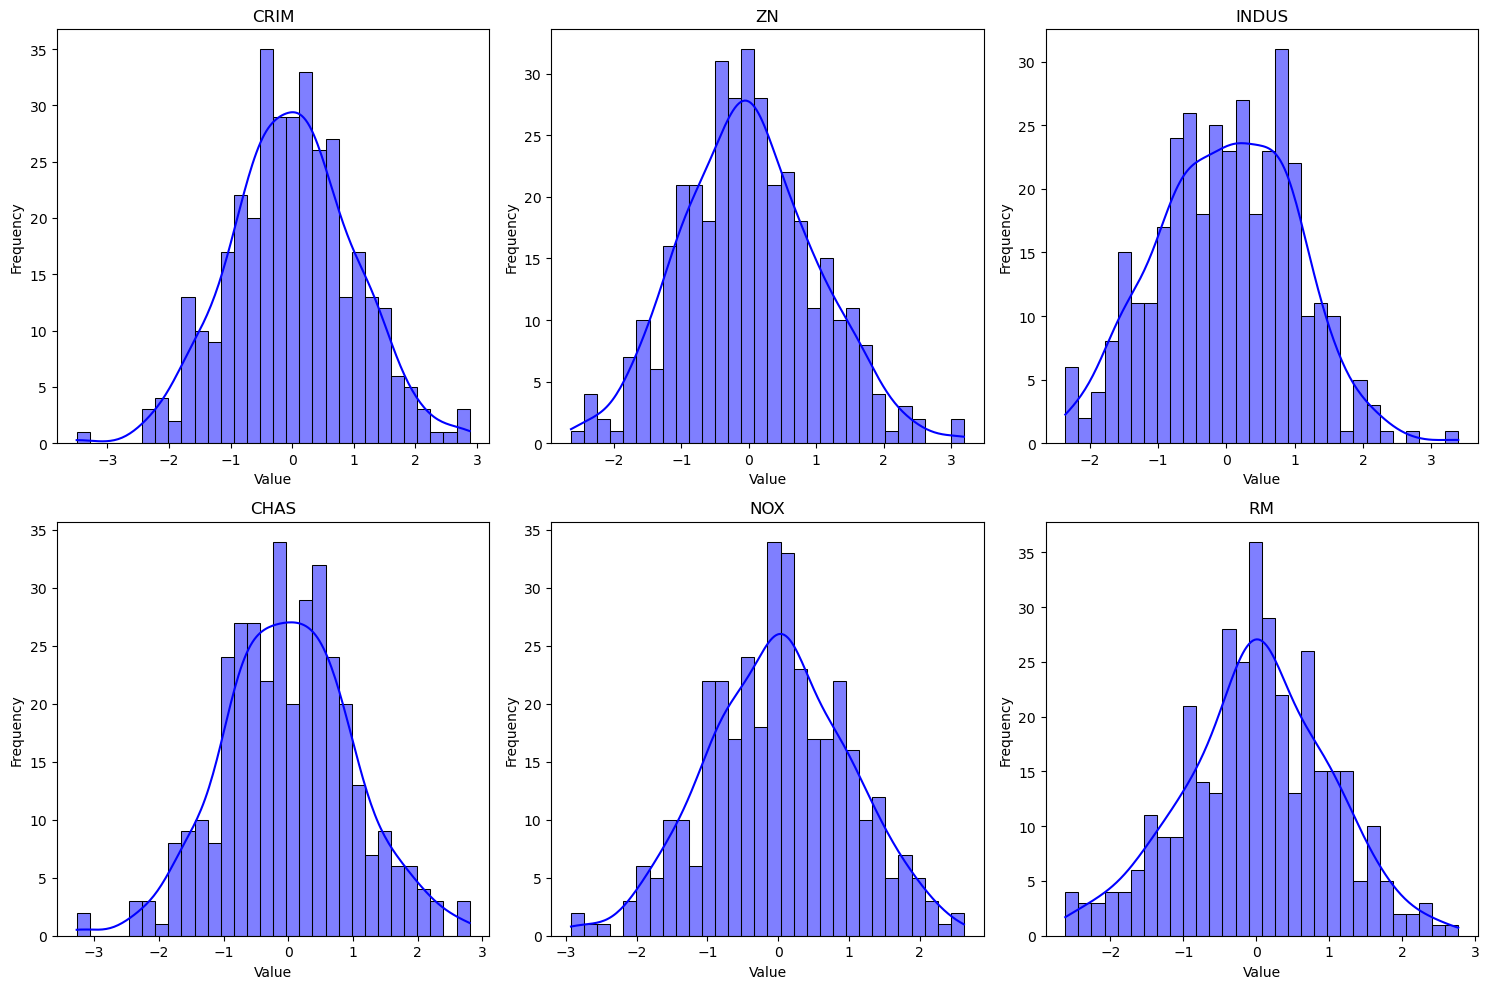

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# estadísticas descriptivas del conjunto de entrenamiento
train_stats = X_train_poly_scaled_df.describe()
print("Estadísticas descriptivas de las características polinómicas (Conjunto de entrenamiento):")
print(train_stats)

# Para la visualización gráfica, podemos mostrar las distribuciones de algunas de las nuevas características polinómicas
# Seleccionamos las primeras 6 características polinómicas para la visualización para no sobrecargar el gráfico
features_to_plot = poly_feature_names[:6]
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X_train_poly_scaled_df[feature], kde=True, bins=30, color='blue')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




He generado estadísticas descriptivas para las nuevas características polinómicas del conjunto de entrenamiento. Estas estadísticas incluyen el recuento, la media, la desviación estándar, los valores mínimos, el percentil 25, la mediana (percentil 50), el percentil 75 y los valores máximos para cada característica transformada.

Para la visualización gráfica, se han mostrado histogramas para las primeras 6 características polinómicas. Estos histogramas proporcionan una visión general de la distribución de cada característica, incluyendo la simetría de la distribución, la presencia de valores atípicos y la dispersión.

Estas visualizaciones y resúmenes estadísticos son herramientas valiosas para comprender la forma y la escala de los datos transformados, lo cual es crucial para el ajuste de modelos y la interpretación de resultados. El análisis visual complementa las estadísticas descriptivas proporcionando una representación intuitiva de los datos

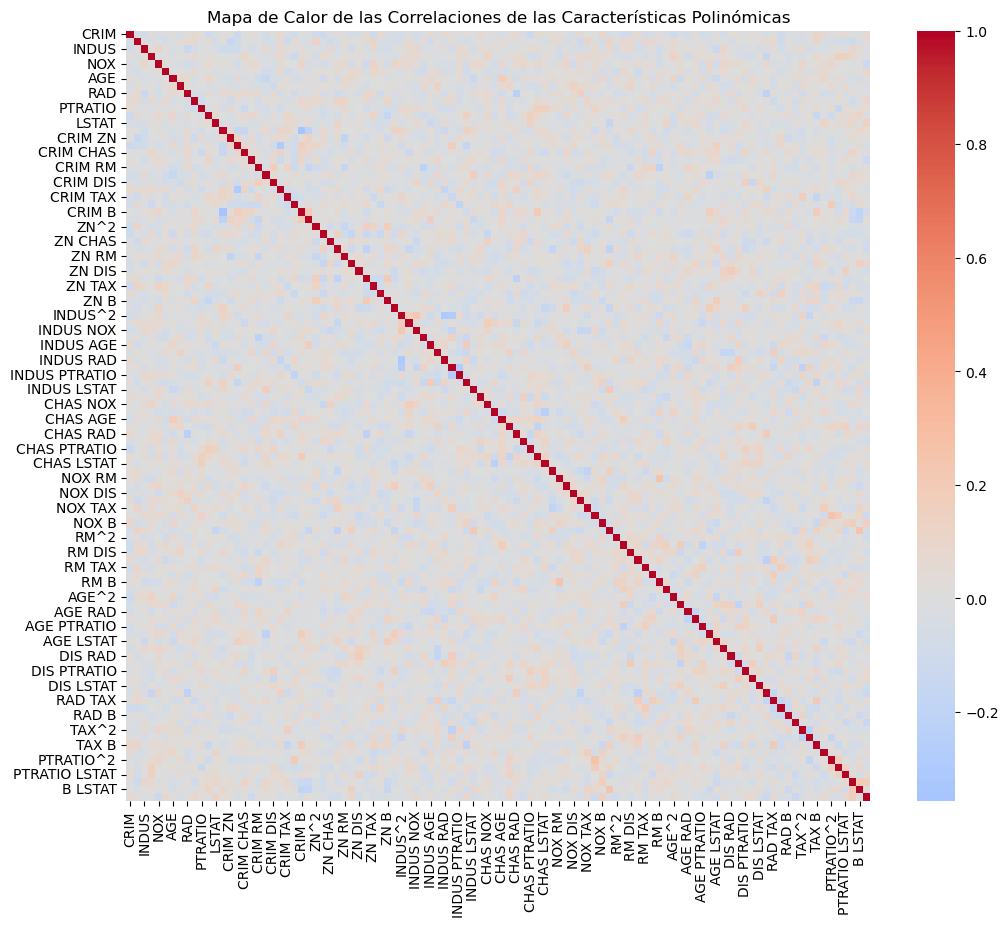

In [146]:
# Matriz de correlación para el conjunto de entrenamiento transformado

correlation_matrix = X_train_poly_scaled_df.corr()

# Mapa de calor de las correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de las Correlaciones de las Características Polinómicas')
plt.show()


He generado un mapa de calor para visualizar la matriz de correlación de las características polinómicas del conjunto de entrenamiento. En el mapa de calor, los colores representan la fuerza de la correlación entre las características: los tonos cálidos (como el rojo) indican una correlación positiva fuerte, los tonos fríos (como el azul) indican una correlación negativa fuerte, y los colores neutros cercanos al blanco representan una correlación baja o nula.

Este tipo de visualización es útil para identificar rápidamente las características que están más correlacionadas entre sí, lo que puede ser importante para la selección de características y para identificar posibles problemas de multicolinealidad en modelos de regresión.